<a href="https://colab.research.google.com/github/marloa30/IoT-For-Beginners/blob/main/Copia_de_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de librerias y espacio de trabajo.

In [ ]:

from google.colab import files
import pandas as pd
import nltk, re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
rm *.xlsx     #elimina todos los archivos del espacio de trabajo

## Carga de informacion

In [ ]:
uploaded = files.upload()   # carga el archivo 

Saving Abstracts.xlsx to Abstracts.xlsx


## Parametros de WordCloud

In [ ]:
palabras=20
idioma='english'          # spanish o english
color_fondo = 'white'   
colocaciones = False         # opción palabras compuestas True 

# Procesamiento

In [ ]:
cp *.xlsx  Data.xlsx

cp: target 'Data.xlsx' is not a directory


In [ ]:
dataset = pd.read_excel('Data.xlsx')

In [ ]:
dataset = dataset.drop_duplicates()
corpus = dataset.values.ravel().tolist()


In [ ]:
def preprocessing(doc):
    wpt=nltk.WordPunctTokenizer()
    stop_words=nltk.corpus.stopwords.words(idioma)
    # Se eliminan caracteres especiales
    doc=re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # Se convierten los téxtos a minúsculas
    doc=doc.lower()
    doc.strip("\n")
    # Se separan signos de puntuación
    tokens=wpt.tokenize(doc)
    # Se eliminan las stopwords
    tokens=[token for token in tokens if token not in stop_words and len(token)>2]
    # Retornamos una versión filtrada del texto
    return ' '.join(tokens)

    def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
      h = int(360.0 * 10.0 / 255.0)
      s = int(100.0 * 255.0 / 255.0)
      l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)


In [ ]:
norm_corpus=list(map(preprocessing,corpus))
corpus_wc = ' '.join([a for a in norm_corpus])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color_fondo,
                      max_words=palabras,
                      collocations=colocaciones,                     # Opción de dos palabras
                      #width=1200,
                      #height=1000,
                      #color_func=random_color_func
                      ).generate(corpus_wc)



In [ ]:
#Pruebas 
type(corpus_wc);



In [ ]:
# Display the generated image:
def imprimir_nube():
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


In [ ]:
# Modelado de temas 

# Lo limitamos a un vocabulario de tamaño 1000


tfidf = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words(idioma), max_features=1000, max_df=0.5, sublinear_tf=True)
tfidf.fit(norm_corpus)
X_tfidf = tfidf.transform(norm_corpus).toarray()
print("La representación TF-IDF es de tamaño: {}".format(X_tfidf.shape))




svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=0)
svd_model.fit(X_tfidf)


terms = tfidf.get_feature_names()

def analisis_topicos():
  for i, comp in enumerate(svd_model.components_):
      # Juntamos los términos con cada uno de los valores en la matriz V
      terms_comp=zip(terms, comp)
      # Ordenamos los términos de acuerdo al resultado de LSA
      sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
      # Mostramos los términos más importantes en cada tópico
      print("Tópico {}: {}".format(i," ".join(list(map(lambda x:x[0], sorted_terms)))))


La representación TF-IDF es de tamaño: (288, 1000)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Resultados

Tópico 0: biodiversity offsets offset development conservation offsetting loss policy net environmental impacts mitigation policies ecological habitat
Tópico 1: market services markets nature institutional mechanisms new banking ecosystem pes instruments marketbased political economic paper
Tópico 2: mitigation nnl hierarchy marine projects practice impacts implementation impact eia measures applied planning application assessment
Tópico 3: nnl economic policies losses loss net biodiversity social marine achieving infrastructure targets gains governance argue
Tópico 4: ecosystem services impacts framework service ratios reclamation different model nnl compensation coastal scenarios mitigation avoidance
Tópico 5: marine ecosystem services australia offsets ecosystems markets used increasingly development offset environment restoration service coastal
Tópico 6: mitigation hierarchy impacts conservation framework targets impact marine offsetting way convention international commitments ad

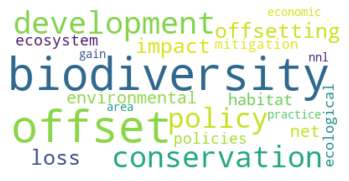

In [ ]:
analisis_topicos()
print("__________________________________________")
print("WORD_CLOUD")
imprimir_nube()